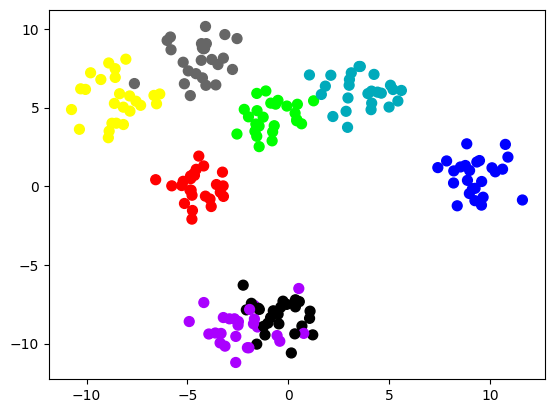

KNN  KNeighborsClassifier(weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.92


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors 

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000','#FF0000', '#00AABB', '#AA00FF','#666666'])
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8, 
                        cluster_std = 1.1, random_state = 7)
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') 

clf.fit(X_train, y_train)


predictions = clf.predict(X_test)
print('KNN ', clf)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Confusion matrix:
 [[8 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0]
 [0 0 0 4 0 0 3 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 1 0 0 9 0]
 [0 0 0 0 0 0 0 7]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       0.80      0.57      0.67         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       0.75      0.90      0.82        10
           7       1.00      1.00      1.00         7

    accuracy                           0.92        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.92      0.92      0.92        50



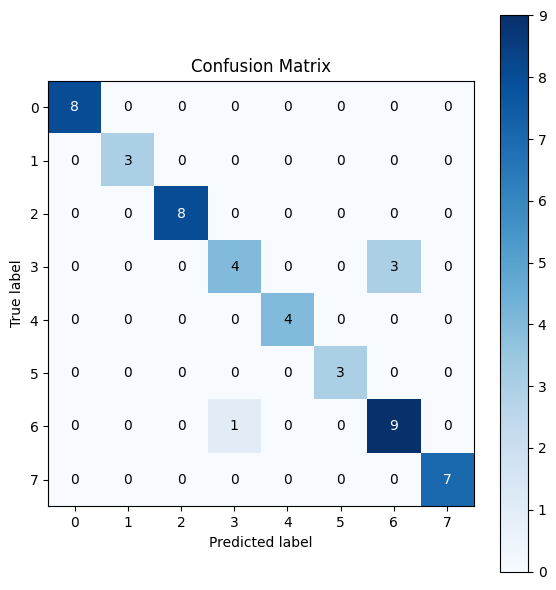

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# predictions = clf.predict(X_test)  # у тебя уже есть

# 1) Печатаем конфузионную матрицу и classification report
cm = confusion_matrix(y_test, predictions)
print("Confusion matrix:\n", cm)
print("\nClassification report:\n")
print(classification_report(y_test, predictions, digits=2))

# 2) Визуализация матрицы ошибок (аннотированная heatmap)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
n_classes = cm.shape[0]
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# подписи с числами внутри ячеек
thresh = cm.max() / 2.
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()
